In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from PIL import Image

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img as li,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

%matplotlib inline

In [0]:
pwd

'/content'

In [0]:
os.chdir('drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition')

In [0]:
Cur_Directory = '/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition'

In [0]:
DataFile = os.path.join(Cur_Directory,"Aligned Face Dataset from Pinterest.zip")

In [0]:
# I am commenting this as i have already unzipped this

"""with ZipFile(DataFile,'r') as data:
  #data.printdir()
  data.extractall() #Extracts all the files in zipfile to the current working directory"""

"with ZipFile(DataFile,'r') as data:\n  #data.printdir()\n  data.extractall() #Extracts all the files in zipfile to the current working directory"

In [0]:
!ls

'Aligned Face Dataset from Pinterest.zip'   pins   PINS   Weights


In [0]:
path = "./PINS"

In [7]:
dir_list = next(os.walk(path))[1]
dir_list.sort()
dir_list[0:5]

['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn']

In [0]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file   

    def __repr__(self):
      #Returns a printable version of the image path in double quotes
      return self.image_path()
    
    def image_path(self):
      return os.path.join(self.base, self.name, self.file)

In [0]:
def load_metadata(path):
  metadata = []
  for i in os.listdir(path):
    for f in os.listdir(os.path.join(path, i)):
      # Check file extension. Allow only jpg/jpeg' files.
      ext = os.path.splitext(f)[1]
      if ext == '.jpg' or ext == '.jpeg':
        metadata.append(IdentityMetadata(path, i, f)) # Current Directory/PINS/FolderNames/imagename in each folder
  return np.array(metadata)

metadata = load_metadata(path)

In [0]:
metadata

array([./PINS/pins_Aaron Paul/Aaron Paul0_262.jpg,
       ./PINS/pins_Aaron Paul/Aaron Paul101_247.jpg,
       ./PINS/pins_Aaron Paul/Aaron Paul50_222.jpg, ...,
       ./PINS/pins_zendaya/zendaya97.jpg,
       ./PINS/pins_zendaya/zendaya98.jpg,
       ./PINS/pins_zendaya/zendaya99.jpg], dtype=object)

In [0]:
len(metadata)

10770

In [0]:
def load_image(path):
    img = cv2.imread(path, 1) #Read color images
    if img is None:
      return None
    else:
      return img[...,::-1]

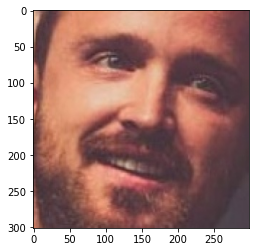

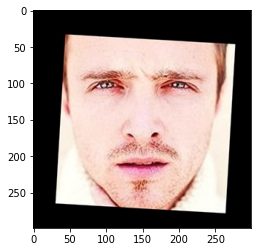

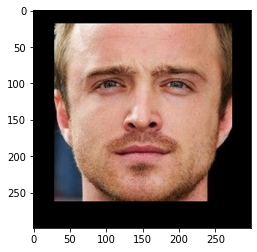

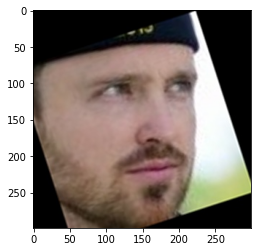

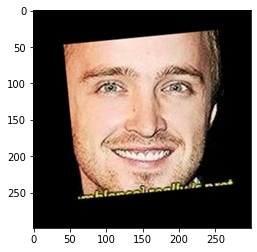

In [0]:
for i in range(5):
  img_path = metadata[i].image_path()
  img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]
  img = (img / 255.).astype(np.float32)
  img=img_to_array(img)
  plt.imshow(img)
  plt.show()

In [0]:
def visualize_image(path):
  for i in os.listdir(path)[0:5]:
    for f in os.listdir(os.path.join(path, i))[0:2]:
      #print(f)
      path_for_image = os.path.join(Cur_Directory,'PINS',i,f)
      print(path_for_image)
      img = cv2.imread(path_for_image,-1)
      plt.imshow(img)
      plt.show()

/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg


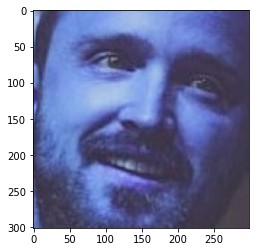

/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition/PINS/pins_Aaron Paul/Aaron Paul101_247.jpg


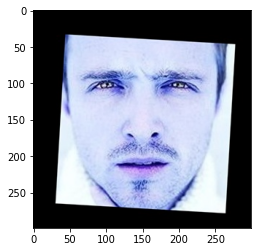

/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition/PINS/pins_Alvaro Morte/Alvaro Morte110_828.jpg


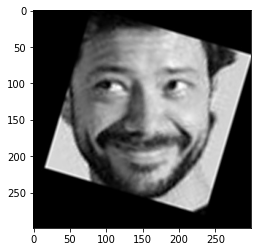

/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition/PINS/pins_Alvaro Morte/Alvaro Morte111_820.jpg


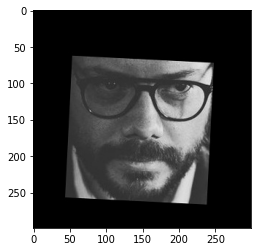

/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition/PINS/pins_Amanda Crew/Amanda Crew104.jpg


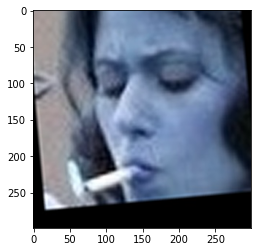

/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition/PINS/pins_Amanda Crew/Amanda Crew38.jpg


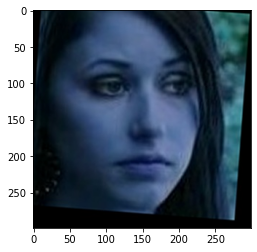

/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition/PINS/pins_Amaury Nolasco/Amaury Nolasco106.jpg


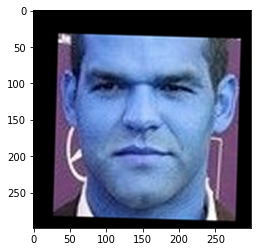

/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition/PINS/pins_Amaury Nolasco/Amaury Nolasco107.jpg


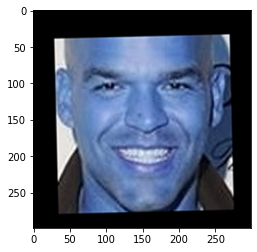

/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition/PINS/pins_Anna Gunn/Anna Gunn104_2289.jpg


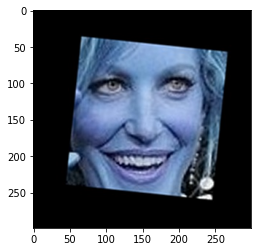

/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceRecognition/PINS/pins_Anna Gunn/Anna Gunn108_2284.jpg


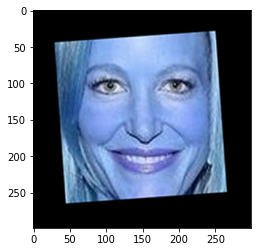

In [0]:
visualize_image(path)

In [0]:
# A pre-defined VGG facenet model for face recognition

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [0]:
model = vgg_face()

In [0]:
weight_Path =  os.path.join(Cur_Directory,'Weights','vgg_face_weights.h5')
model.load_weights(weight_Path)

In [0]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

# Get the input layer and the flatten layer. In the above line we defined model upto Flatten() layer.
# Now we can feed any image to get embeddings which will be used to train our own classifier/recognizer.

In [0]:
%%time
embeddings = []

for i in range(len(metadata)):
  if(i>10765): #Just to verify whether the execution
    print("Working on "+str(i)+" image")
  img_path = metadata[i].image_path()
  img = load_image(img_path)

  if img is None:
    embedding_vector=np.zeros(2622,)
    embeddings.append(embedding_vector)
    print("This image yields None "+img_path)
    #If there is any error in reading any image in the dataset, 
    #fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622 and append it to embeddings

  else:
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    #print(img.shape)

  #Obtaining embedding vector for an image
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings.append(embedding_vector)
    #print(embedding_vector.shape)

print("Finished")

# For some reasons Caity Lotz65.jpg is not even considered as image, and even the photo viewers and paint does not open this image
# So we have converted this with arrays of zero

# If u run this cell again, same image wont appear as none, as all none image are replaced with zeros

This image yields None ./PINS/pins_Caity Lotz/Caity Lotz65.jpg
Working on 10766 image
Working on 10767 image
Working on 10768 image
Working on 10769 image
Finished
CPU times: user 7min 52s, sys: 2min 2s, total: 9min 55s
Wall time: 10min 4s


In [0]:
print(len(embeddings))

10770


In [0]:
embeddings[56]

array([ 0.03814596, -0.01217128, -0.00034286, ..., -0.01668006,
       -0.00670524,  0.00570739], dtype=float32)

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

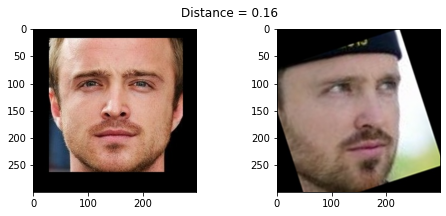

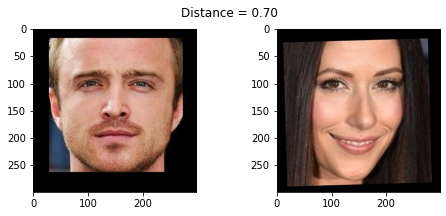

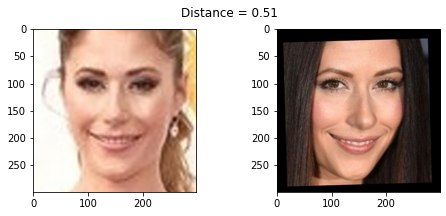

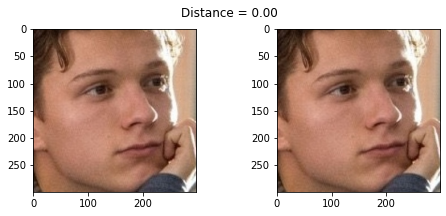

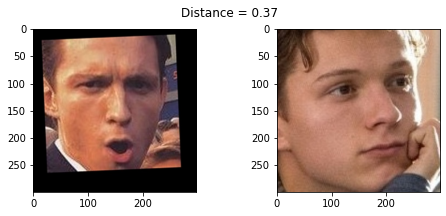

In [0]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(200, 180)
show_pair(10650, 10650)
show_pair(10649, 10650)

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [0]:
len(train_idx)

10770

In [0]:
targets = np.array([str(foldername.name).split("_")[1] for foldername in metadata])

In [0]:
targets

array(['Aaron Paul', 'Aaron Paul', 'Aaron Paul', ..., 'zendaya',
       'zendaya', 'zendaya'], dtype='<U24')

In [0]:

X_train = np.array(embeddings)[train_idx]

X_test = np.array(embeddings)[test_idx] 

y_train = targets[train_idx]
y_test = targets[test_idx]

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9573, 2622)
(9573,)
(1197, 2622)
(1197,)


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [0]:
y_train_labels.classes_

array(['Aaron Paul', 'Alvaro Morte', 'Amanda Crew', 'Amaury Nolasco',
       'Anna Gunn', 'Benedict Cumberbatch', 'Betsy Brandt',
       'Brenton Thwaites', 'Brit Marling', 'Bryan Cranston', 'Caity Lotz',
       'Cameron Monaghan', 'Chance Perdomo', 'Chris Evans', 'Chris Pratt',
       'Cobie Smulders', 'Danielle Panabaker', 'Dave Franco',
       'Dominic Purcell', 'Dwayne Johnson', 'Emilia Clarke',
       'Emily Bett Rickards', 'Emma Stone', 'Gwyneth Paltrow',
       'Henry Cavil', 'Jason Momoa', 'Jeremy Renner', 'Jesse Eisenberg',
       'Jim Parsons', 'Jon Bernthal', 'Josh Radnor', 'Kit Harington',
       'Krysten Ritter', 'Kumail Nanjiani', 'Maisie Williams',
       'Mark Ruffalo', 'Martin Starr', 'Melissa benoit', 'Mike Colter',
       'Morena Baccarin', 'Morgan Freeman', 'Natalie Portman ',
       'Neil Patrick Harris', 'Paul Rudd', 'Pedro Alonso',
       'Peter Dinklage', 'RJ Mitte', 'Rami Melek', 'Robert Knepper',
       'Robin Taylor', 'Ryan Reynolds', 'Sarah Wayne Callies',
 

In [0]:
y_test_labels.classes_

array(['Aaron Paul', 'Alvaro Morte', 'Amanda Crew', 'Amaury Nolasco',
       'Anna Gunn', 'Benedict Cumberbatch', 'Betsy Brandt',
       'Brenton Thwaites', 'Brit Marling', 'Bryan Cranston', 'Caity Lotz',
       'Cameron Monaghan', 'Chance Perdomo', 'Chris Evans', 'Chris Pratt',
       'Cobie Smulders', 'Danielle Panabaker', 'Dave Franco',
       'Dominic Purcell', 'Dwayne Johnson', 'Emilia Clarke',
       'Emily Bett Rickards', 'Emma Stone', 'Gwyneth Paltrow',
       'Henry Cavil', 'Jason Momoa', 'Jeremy Renner', 'Jesse Eisenberg',
       'Jim Parsons', 'Jon Bernthal', 'Josh Radnor', 'Kit Harington',
       'Krysten Ritter', 'Kumail Nanjiani', 'Maisie Williams',
       'Mark Ruffalo', 'Martin Starr', 'Melissa benoit', 'Mike Colter',
       'Morena Baccarin', 'Morgan Freeman', 'Natalie Portman ',
       'Neil Patrick Harris', 'Paul Rudd', 'Pedro Alonso',
       'Peter Dinklage', 'RJ Mitte', 'Rami Melek', 'Robert Knepper',
       'Robin Taylor', 'Ryan Reynolds', 'Sarah Wayne Callies',
 

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

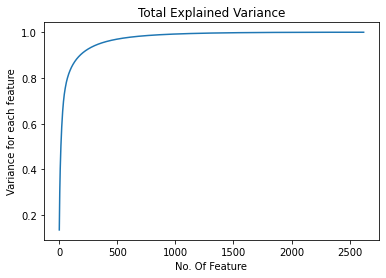

In [0]:
# Reduce dimensions using PCA

from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('No. Of Feature')
plt.ylabel('Variance for each feature')

plt.title('Total Explained Variance')

#Plotting the Cumulative Sum of the Explained Variance
plt.show()

In [0]:
pca = PCA(n_components=1250) #Eyeballing it, this seems to be the point where almost more than 95 percent of variance is explained
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Lets build a SVM classifier on the flattened layer we got as output from the VggFace

from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, clf.predict(X_test))

0.9490392648287385

In [0]:
import warnings
from random import *
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

items = list(range(len(X_test)))
sample_idx = sample(items, 1) # Pick one imahe index randomly from total number of images
sample_idx = sample_idx[0] 
sample_image = load_image(metadata[test_idx][sample_idx].image_path())

def pre_process_test_image(): 
  img = (sample_image / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  embedding_vector_testImg = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  scaled_test_img = scaler.transform(embedding_vector_testImg.reshape(-1, 1).T)
  reduced_testImage_Feature = pca.transform(scaled_test_img)

  return reduced_testImage_Feature

    

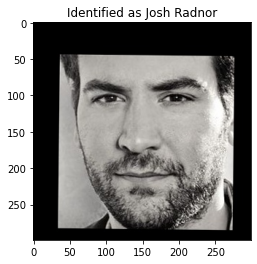

In [0]:
example_prediction = clf.predict(pre_process_test_image())
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(sample_image)
plt.title(f'Identified as {example_identity}')
plt.show()

In [0]:
items = list(range(len(X_test)))
sample_idx = sample(items, 1)
sample_idx = sample_idx[0]
sample_idx

882

In [0]:
y_train.shape[0]

9573